In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
txn_data = pd.read_excel("/content/KPMGData4Analysis.xlsx")
demographic = pd.read_excel("/content/KPMGData4Analysis.xlsx",sheet_name = 1)
address = pd.read_excel("/content/KPMGData4Analysis.xlsx",sheet_name = 2)
data = pd.read_excel("/content/KPMGData4Analysis.xlsx",sheet_name = 3)

In [ ]:
txn_data.head(6)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0


In [ ]:
demographic.head(6)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0


In [ ]:
address.head(6)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9


In [3]:
data.head(6)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.71,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.49,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.49,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.47,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.74,4,1.703125
5,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,0.92,6,1.671875


**Questions-Assumptions-Hypothesis-Recommendations**
*1. We can make a null hypothesis that there is no relationship between Property Evaluation and Value. I would check whether Tenurity has an impact on the value or not. Based on the z_score and p-value we can conclude the assumption that we made*
*2. If we look into the NewCustomerList dataset, we could regress the Value of the customer based on the explanatory variables. So we can assume that there is a linear relationship exists between the variables*
*3. In the transaction tab Product Class and Product Size have same categories. It's redundant.*
*4. A few features from Transactions tab could be significant to assess the customer value. So those variables can be added in NewCustomerList dataset considering the model building part*
*5. What is meant by 'default' column in demographic sheet?*

In [4]:
data.shape

(1000, 19)

In [5]:
data.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Rank                                            int64
Value                       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [7]:
data.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Rank                                     0
Value                                    0
dtype: int64

In [8]:
data = data.drop(['Unnamed: 16'],axis=1)

In [ ]:
data['job_title'].value_counts()

Associate Professor           15
Environmental Tech            14
Software Consultant           14
Chief Design Engineer         13
Assistant Media Planner       12
                              ..
Staff Accountant I             1
Programmer Analyst IV          1
Staff Accountant III           1
Administrative Assistant I     1
Web Developer IV               1
Name: job_title, Length: 184, dtype: int64

In [9]:
data['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [ ]:
data['job_title'].fillna(data['job_title'].mode()[0], inplace=True)

In [10]:
data['job_industry_category'].fillna(data['job_industry_category'].mode()[0], inplace=True)

In [11]:
data = data.dropna(how="any",axis=0)

In [12]:
data.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [13]:
data.shape

(852, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


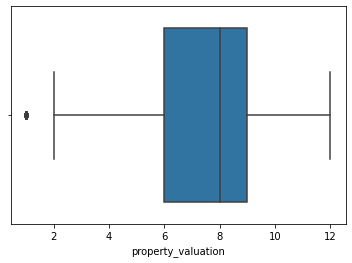

In [14]:
sns.boxplot(data['property_valuation'])

In [15]:
#Finding the IQR
percentile25 = data['property_valuation'].quantile(0.25)
percentile75 = data['property_valuation'].quantile(0.75)
#Finding upper and lower limit
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#using capping
data['property_valuation'] = np.where(
    data['property_valuation'] > upper_limit,
    upper_limit,
    np.where(
        data['property_valuation'] < lower_limit,
        lower_limit,
        data['property_valuation']
    )
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


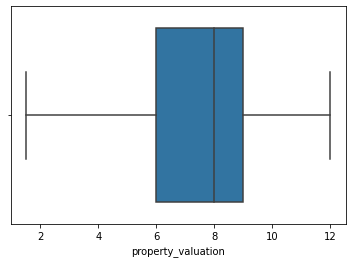

In [16]:
sns.boxplot(data['property_valuation'])

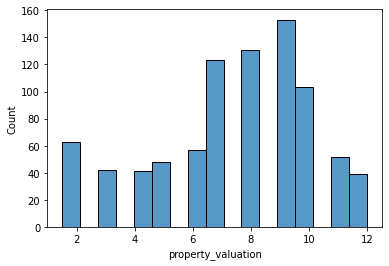

In [17]:
sns.histplot(data['property_valuation'])

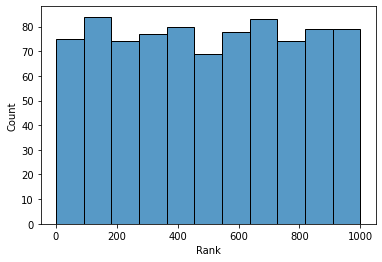

In [18]:
sns.histplot(data['Rank'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


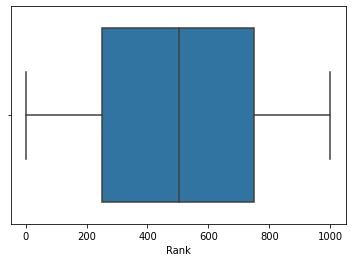

In [19]:
sns.boxplot(data['Rank'])

In [20]:
data.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [21]:
data.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                            float64
Rank                                            int64
Value                                         float64
dtype: object

In [22]:
data = data.drop(['deceased_indicator','country', 'postcode', 'address'],axis=1)

In [ ]:
data.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,QLD,6.0,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,NSW,11.0,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,VIC,5.0,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,QLD,1.5,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,NSW,9.0,4,1.703125


In [23]:
import datetime as DT
import io

In [24]:
now = pd.Timestamp('now')
data['DOB'] = pd.to_datetime(data['DOB'], format='%m%d%y')    # 1
data['DOB'] = data['DOB'].where(data['DOB'] < now, data['DOB'] -  np.timedelta64(100, 'Y'))   # 2
data['Age'] = (now - data['DOB']).astype('<m8[Y]')    # 3

In [ ]:
data.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Rank,Value,age,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,QLD,6.0,1,1.718750,64.0,64.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,NSW,11.0,1,1.718750,51.0,51.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,VIC,5.0,1,1.718750,47.0,47.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,QLD,1.5,4,1.703125,42.0,42.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,NSW,9.0,4,1.703125,55.0,55.0


In [25]:
bins= [18,30,40,50,60,100]
labels=["Young","Matured","Middle aged","Senior","Old"]
data["Age_Group"]= pd.cut(data["Age"],bins=bins,labels=labels, right=False)

In [ ]:
#This is for some sort of EDA 

In [28]:
cols = ['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']

In [49]:
df = pd.get_dummies(data=data.drop(['Value','Rank','property_valuation','DOB','past_3_years_bike_related_purchases','Age','tenure'],axis=1), drop_first=True)

In [50]:
df.shape

(852, 1850)

In [32]:
data.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'Rank', 'Value', 'Age', 'Age_Group'],
      dtype='object')

In [51]:
new_data = pd.concat([df,data.drop(['first_name', 'last_name', 'gender', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car',
       'state', 'Age_Group'],axis=1)],axis=1)

In [43]:
new_data.columns

Index(['past_3_years_bike_related_purchases', 'DOB', 'tenure',
       'property_valuation', 'Rank', 'Age', 'first_name_Abner',
       'first_name_Adolpho', 'first_name_Adria', 'first_name_Adriane',
       ...
       'Age_Group_Senior', 'Age_Group_Old',
       'past_3_years_bike_related_purchases', 'DOB', 'tenure',
       'property_valuation', 'Rank', 'Value', 'Age', 'Age_Group'],
      dtype='object', length=1864)

In [52]:
X = new_data.drop(['Value'],axis=1)
y = new_data['Value']

In [53]:
from sklearn.model_selection import train_test_split
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(596, 1855) (256, 1855) (596,) (256,)


In [54]:
from sklearn.preprocessing import StandardScaler
inst = StandardScaler()
X_train = pd.DataFrame(inst.fit_transform(X_train))
X_test = pd.DataFrame(inst.fit_transform(X_test))

In [55]:
# importing necessary libraries
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

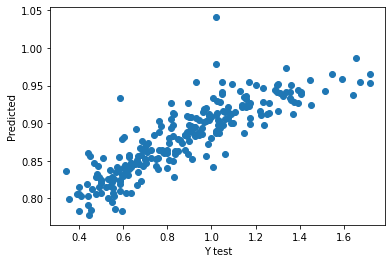

In [56]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted')
plt.xlabel('Y test')
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# summarize prediction
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2: {}'.format(r2_score(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
N=y_test.shape[0]
p=3
x = (1-r2)
m = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * m))
print("Adjusted-R2 : " , adj_rsquared)

MAE: 0.20878510470139416
MSE: 0.06667282594462158
RMSE: 0.25821081686215547
R2: 0.24781680365224146
Adjusted-R2 :  0.2388622417909586


In [58]:
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
regressor.coef_

array([[ 0.00000000e+00, -1.86347248e-20, -2.83393609e-03, ...,
         2.11576112e-04, -6.57102674e-02, -1.13666440e-03]])

In [59]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

In [60]:
np.mean(cross_val_score(RidgeCV(), X_train, y_train, scoring='neg_mean_squared_error'))

-0.04823401996812352

In [61]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [62]:
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.242 (0.017)


In [63]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
# summarize prediction
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2: {}'.format(r2_score(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
N=y_test.shape[0]
p=3
x = (1-r2)
m = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * m))
print("Adjusted-R2 : " , adj_rsquared)

MAE: 0.24388720703125
MSE: 0.08864112847438388
RMSE: 0.29772660021298714
R2: -2.311885076067277e-05
Adjusted-R2 :  -0.011928155979936461


In [65]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = 1, random_state =1)

# fit the regressor with x and y data
model = regressor.fit(X_train, y_train)

In [66]:
y_pred=regressor.predict(X_test)

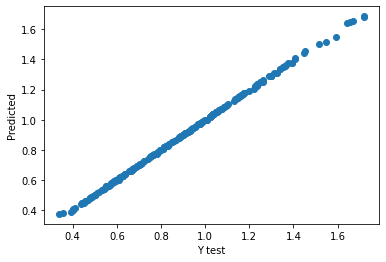

In [67]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted')
plt.xlabel('Y test')
plt.show()

In [68]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2: {}'.format(r2_score(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
N=y_test.shape[0]
p=3
x = (1-r2)
m = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * m))
print("Adjusted-R2 : " , adj_rsquared)

MAE: 0.002855504161938369
MSE: 4.071308864436578e-05
RMSE: 0.0063806808919084634
R2: 0.9995406869183084
Adjusted-R2 :  0.9995352189054312


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


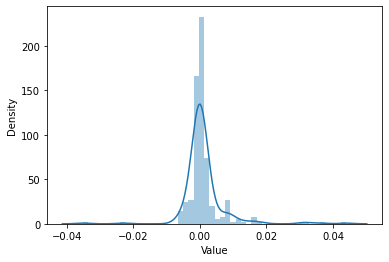

In [69]:
import seaborn as sns
sns.distplot((y_test-y_pred))